In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_data = pd.read_csv('credit-score.csv', low_memory=False)
raw_data.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [5]:
raw_data.shape

(100000, 28)

In [6]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
deleted_cols = ['ID','Customer_ID', 'Month', 'SSN', 'Name','Type_of_Loan']


In [8]:
raw_data = raw_data.drop(deleted_cols, axis = 1)


In [9]:
raw_data.shape

(100000, 22)

In [10]:
raw_data.isnull().sum()[raw_data.isnull().sum()>0]


Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

In [11]:
raw_data.columns


Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [12]:
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
'Num_Bank_Accounts',
'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
'Delay_from_due_date',
'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
'Num_Credit_Inquiries',
'Outstanding_Debt',
'Payment_of_Min_Amount', 'Total_EMI_per_month',
'Amount_invested_monthly',
'Monthly_Balance']
text_columns = ['Occupation', 'Credit_Mix', 'Payment_Behaviour','Credit_Score',
'Credit_History_Age','Credit_Utilization_Ratio']


In [13]:
symbols = "\\`*_{}[]()>#@+!$:;"
for i in numerical_columns:
    for j in symbols:
        raw_data[i] = raw_data[i].astype(str).str.replace(j,'',regex = False)
for i in text_columns:
    for j in symbols:
        raw_data[i] = raw_data[i].replace(j,'',regex = False)
raw_data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,7,...,,809.98,26.822620,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,nan,3,4,3,4,-1,nan,...,Good,809.98,31.944960,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,nan,3,4,3,4,3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,nan,3,4,3,4,5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,6,nan,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [14]:
raw_data['Occupation'] = raw_data['Occupation'].replace('_______', np.nan)
raw_data['Payment_Behaviour'] = raw_data['Payment_Behaviour'].replace('!@9#%8',np.nan)
raw_data['Payment_of_Min_Amount'] = raw_data['Payment_of_Min_Amount'].replace('NM',np.nan)
raw_data['Credit_Mix'] = raw_data['Credit_Mix'].replace('_', np.nan)
raw_data['Credit_Mix'] = raw_data['Credit_Mix'].replace('', np.nan)

In [15]:
raw_data.isnull().sum()

Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7600
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     100000 non-null  object 
 4   Num_Bank_Accounts         100000 non-null  object 
 5   Num_Credit_Card           100000 non-null  object 
 6   Interest_Rate             100000 non-null  object 
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  object 
 9   Num_of_Delayed_Payment    100000 non-null  object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      100000 non-null  object 
 12  Credit_Mix                79805 non-null   object 
 13  Outstanding_Debt          100000 non-null  ob

In [17]:
raw_data.head(20)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,7,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,nan,3,4,3,4,-1,nan,...,Good,809.98,31.944960,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,nan,3,4,3,4,3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,nan,3,4,3,4,5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,6,nan,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,23,Scientist,19114.12,nan,3,4,3,4,8,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.57494921489417,62.430172331195294,NaN,340.4792117872438,Good
6,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,8,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.57494921489417,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,6,...,Good,809.98,23.933795,NaN,No,49.57494921489417,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,28,NaN,34847.84,3037.986666666666,2,4,6,1,3,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816214573128885,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986666666666,2,4,6,1,7,1,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816214573128885,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [18]:
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace('Years and','.')
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace('Months','')
raw_data['Credit_History_Age'] = raw_data['Credit_History_Age'].astype(str).str.replace(' ','')

In [19]:
raw_data.head(5)


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,3,7,...,NaN,809.98,26.822620,22.1,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,nan,3,4,3,4,-1,nan,...,Good,809.98,31.944960,nan,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,nan,3,4,3,4,3,7,...,Good,809.98,28.609352,22.3,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,nan,3,4,3,4,5,4,...,Good,809.98,31.377862,22.4,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.8433333333328,3,4,3,4,6,nan,...,Good,809.98,24.797347,22.5,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [20]:
filled_data = raw_data.copy()

In [21]:
object_cols = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Age']

In [22]:
for i in object_cols:
    filled_data[i] = pd.to_numeric(filled_data[i], errors='coerce')


In [23]:
filled_data.isnull().sum()[filled_data.isnull().sum()>0]

Occupation                  7062
Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Payment_of_Min_Amount      12007
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

In [24]:
filled_data['Occupation'].unique()


array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [25]:
filled_data['Occupation'] = filled_data['Occupation'].fillna(np.random.choice(pd.Series(['Scientist','Teacher', 'Engineer', 'Entrepreneur',
'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
'Architect'])))

In [26]:
filled_data['Occupation'].isnull().sum()

0

In [27]:
filled_data['Credit_Mix'].unique()

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

In [28]:
filled_data['Credit_Mix'] = filled_data['Credit_Mix'].fillna(np.random.choice(pd.Series(['Good', 'Standard', 'Bad'])))
filled_data['Credit_Mix'].isnull().sum()

0

In [29]:
filled_data['Payment_of_Min_Amount'].unique()


array(['No', nan, 'Yes'], dtype=object)

In [30]:
filled_data['Payment_of_Min_Amount'] = filled_data['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes','No'])))
filled_data['Payment_of_Min_Amount'].isnull().sum()

0

In [31]:
filled_data['Payment_Behaviour'].unique()


array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [32]:
filled_data['Payment_Behaviour'] = filled_data['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
'Low_spent_Large_value_payments',
'Low_spent_Medium_value_payments',
'Low_spent_Small_value_payments',
'High_spent_Medium_value_payments',
'High_spent_Large_value_payments'])))
filled_data['Payment_Behaviour'].isnull().sum()


0

In [33]:
for i in['Monthly_Inhand_Salary','Credit_History_Age','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']:
    filled_data[i].fillna(filled_data[i].median(), inplace=True)

In [34]:
filled_data.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [35]:
filled_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [36]:
for i in filled_data:
    if i =='' or i== 'nan':
        print('\n',i,filled_data[i])

In [37]:
explored_data = filled_data.copy()


In [38]:
round_cols=['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
for i in round_cols:
    explored_data[i] = explored_data[i].apply(lambda x: round(x,2))


In [39]:
explored_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.0000,33.000,42.0000,8698.00
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.5000,37578.610,72790.9200,24198062.00
Monthly_Inhand_Salary,100000.0,4.029086e+03,2.961363e+03,3.036500e+02,1792.0800,3093.750,5371.5300,15204.63
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.0000,6.000,7.0000,1798.00
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.0000,5.000,7.0000,1499.00
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.0000,13.000,20.0000,5797.00
Num_of_Loan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.0000,3.000,5.0000,1496.00
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.0000,18.000,28.0000,67.00
Num_of_Delayed_Payment,100000.0,2.973837e+01,2.180176e+02,-3.000000e+00,9.0000,14.000,18.0000,4397.00
Changed_Credit_Limit,100000.0,1.036834e+01,6.719627e+00,-6.490000e+00,5.4200,9.400,14.6600,36.97


In [40]:
explored_data.describe(include='object').T

,count,unique,top,freq
Occupation,100000,15,Mechanic,13353
Credit_Mix,100000,3,Good,44532
Payment_of_Min_Amount,100000,2,Yes,64333
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,25513
Credit_Score,100000,3,Standard,53174


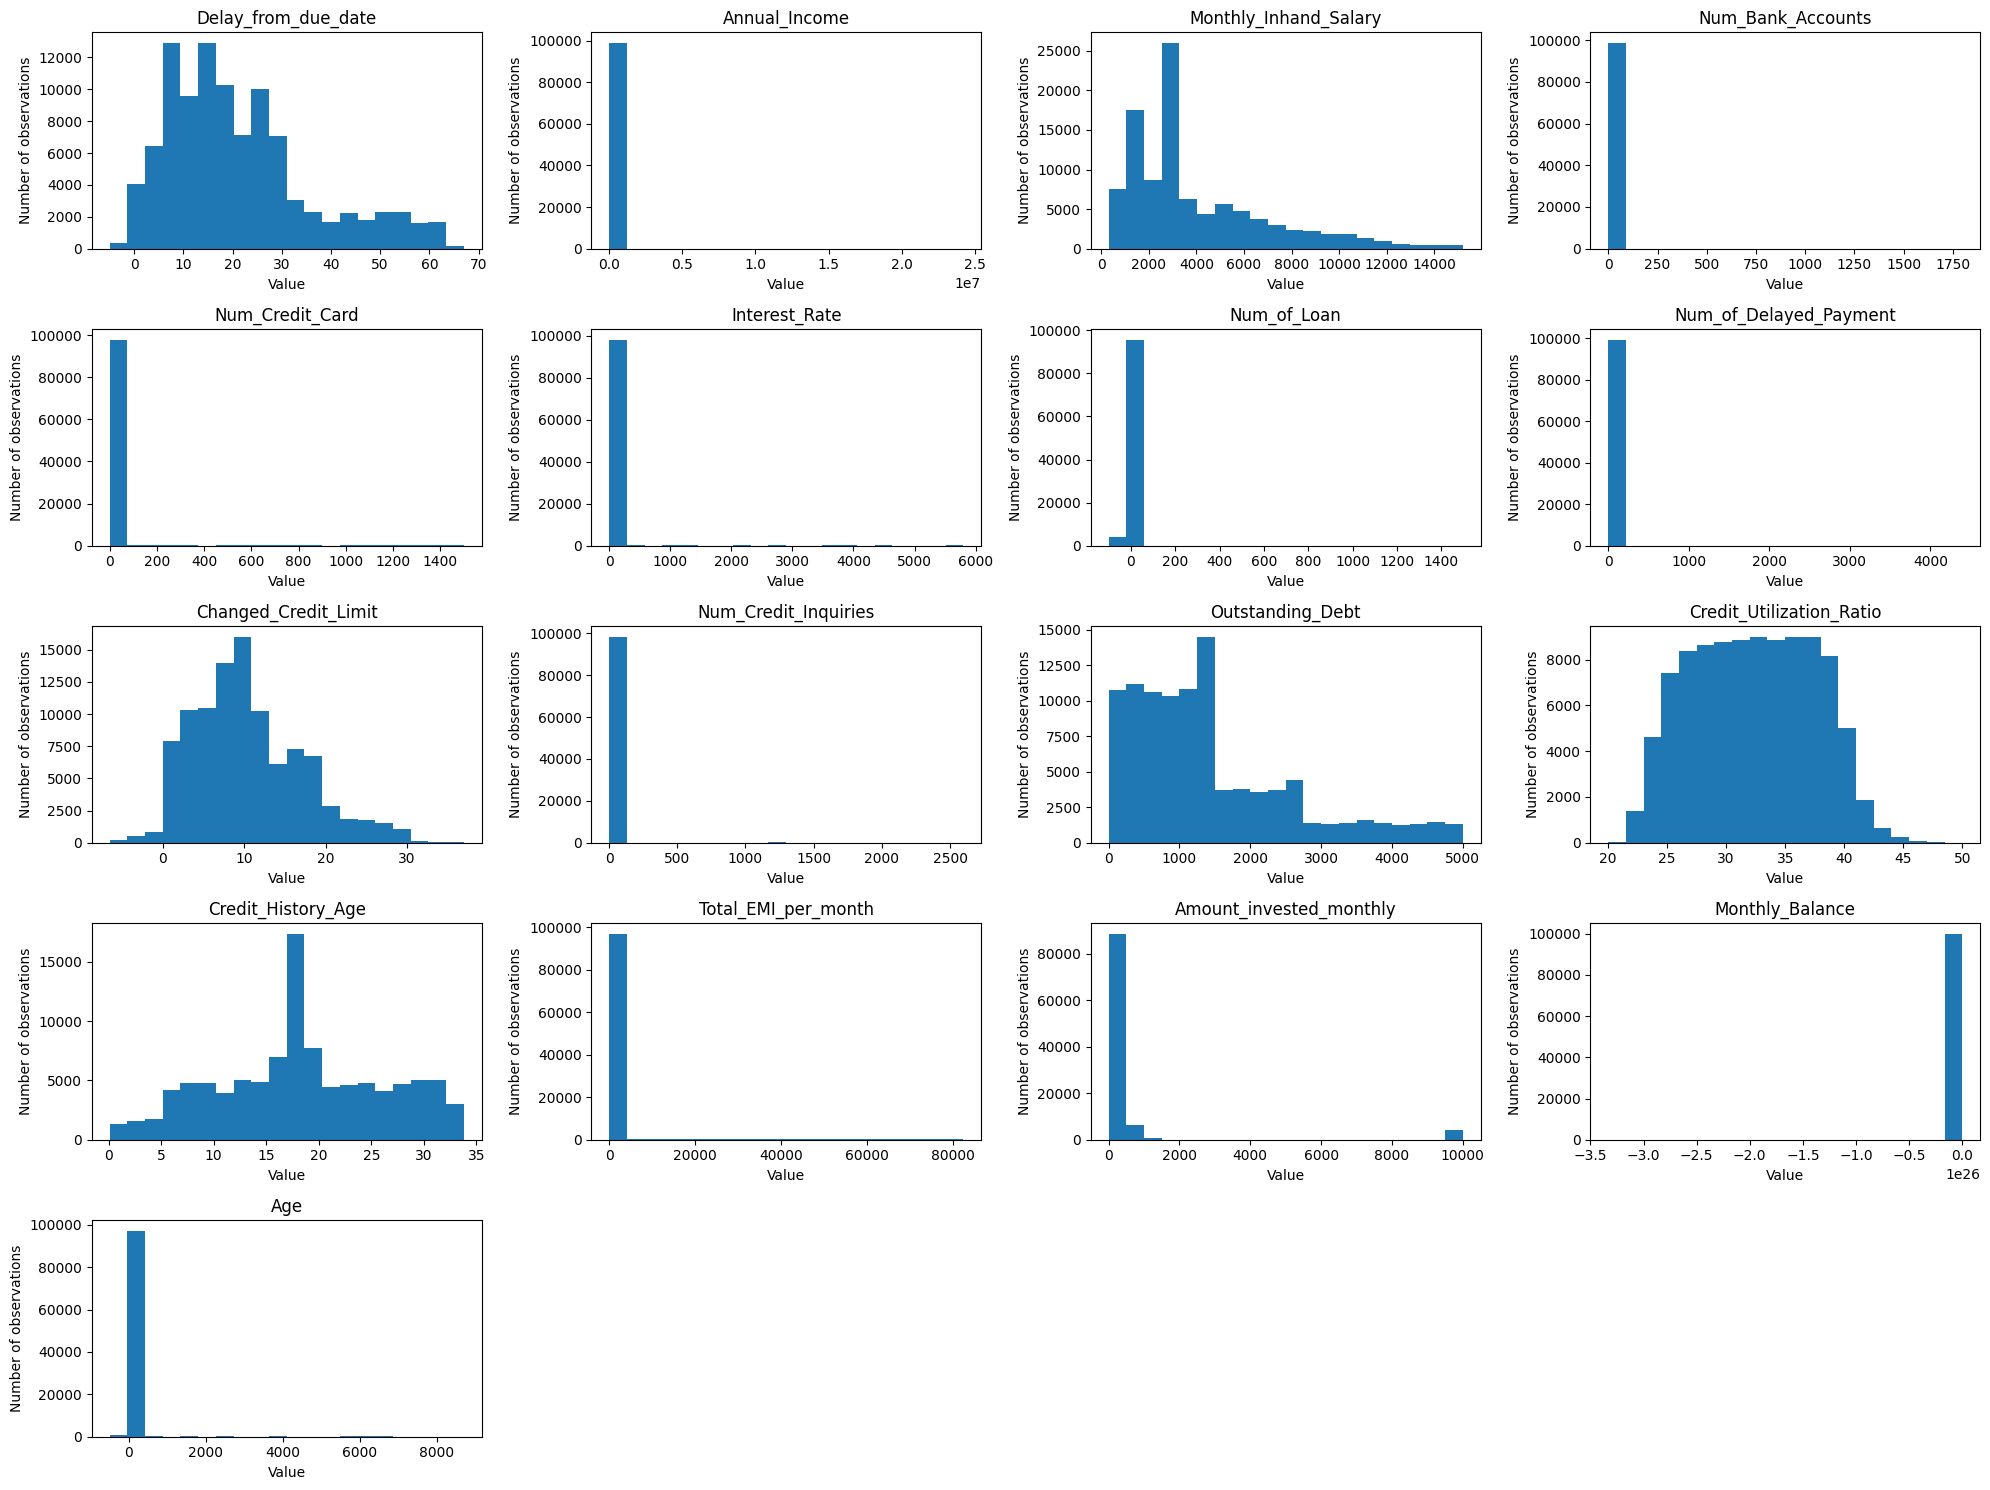

In [41]:
columns_num = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Age']
num_cols = 4
num_rows = len(columns_num) // num_cols + (len(columns_num) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, column in enumerate(columns_num):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(explored_data[column], bins=20)
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
if len(columns_num) < num_rows * num_cols:
    for j in range(len(columns_num), num_rows * num_cols):
        axes.flat[j].set_visible(False)
plt.tight_layout()
plt.show()

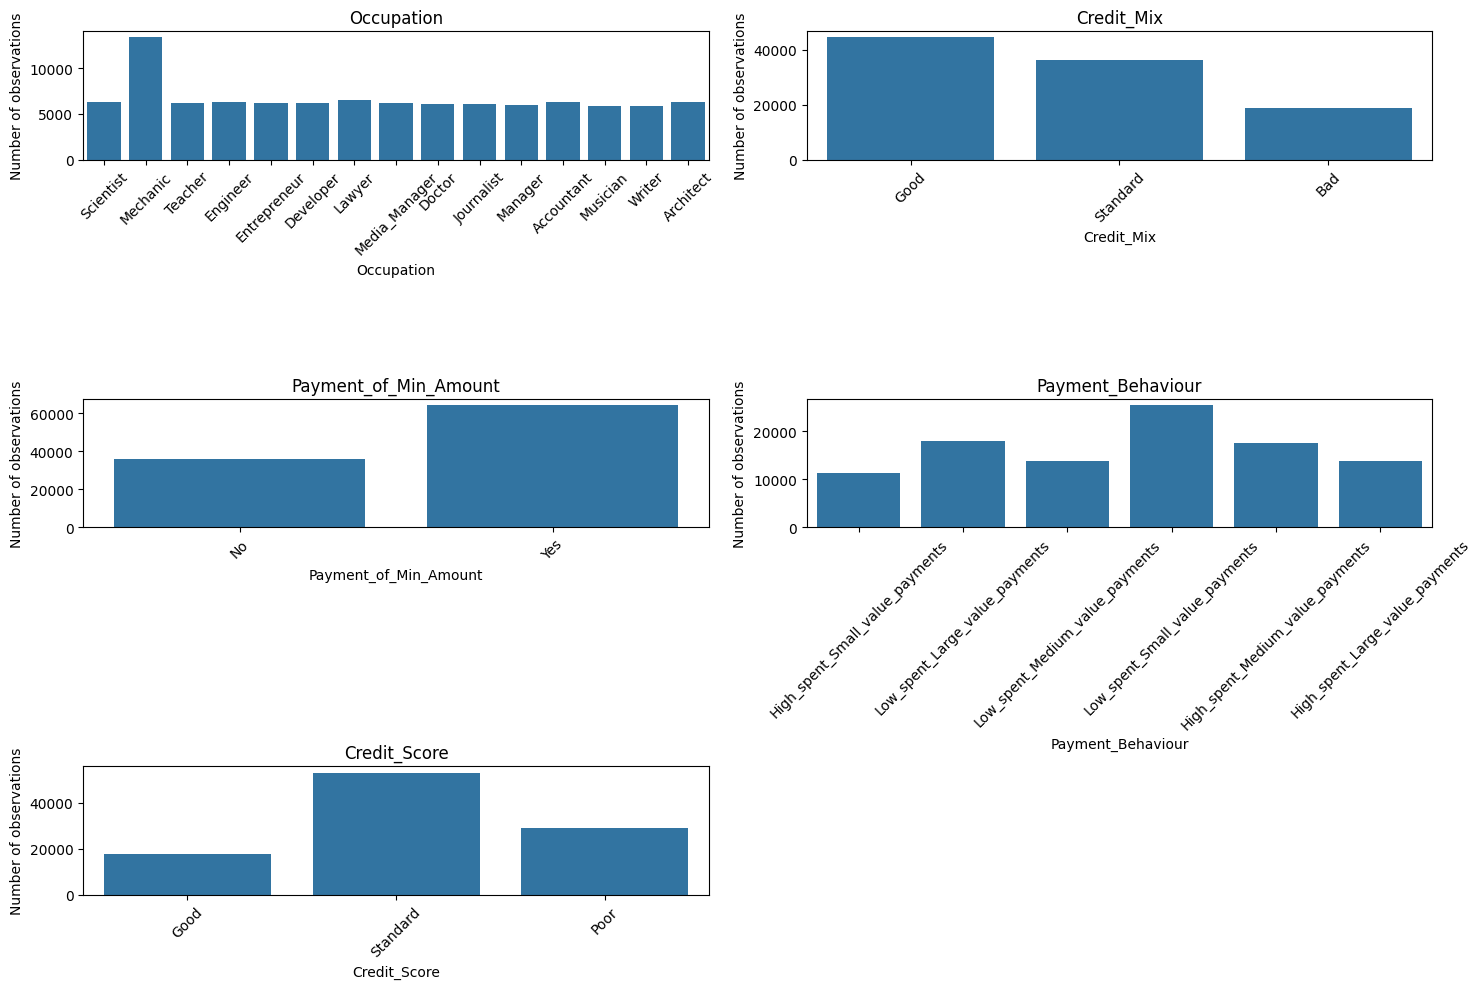

In [42]:
columns_text = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour', 'Credit_Score']
num_cols = 2
num_rows = len(columns_text) // num_cols + (len(columns_text) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i, column in enumerate(columns_text):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(x=column, data=explored_data, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)
if len(columns_text) < num_rows * num_cols:
    for j in range(len(columns_text), num_rows * num_cols):
        axes.flat[j].set_visible(False)
plt.tight_layout()
plt.show()


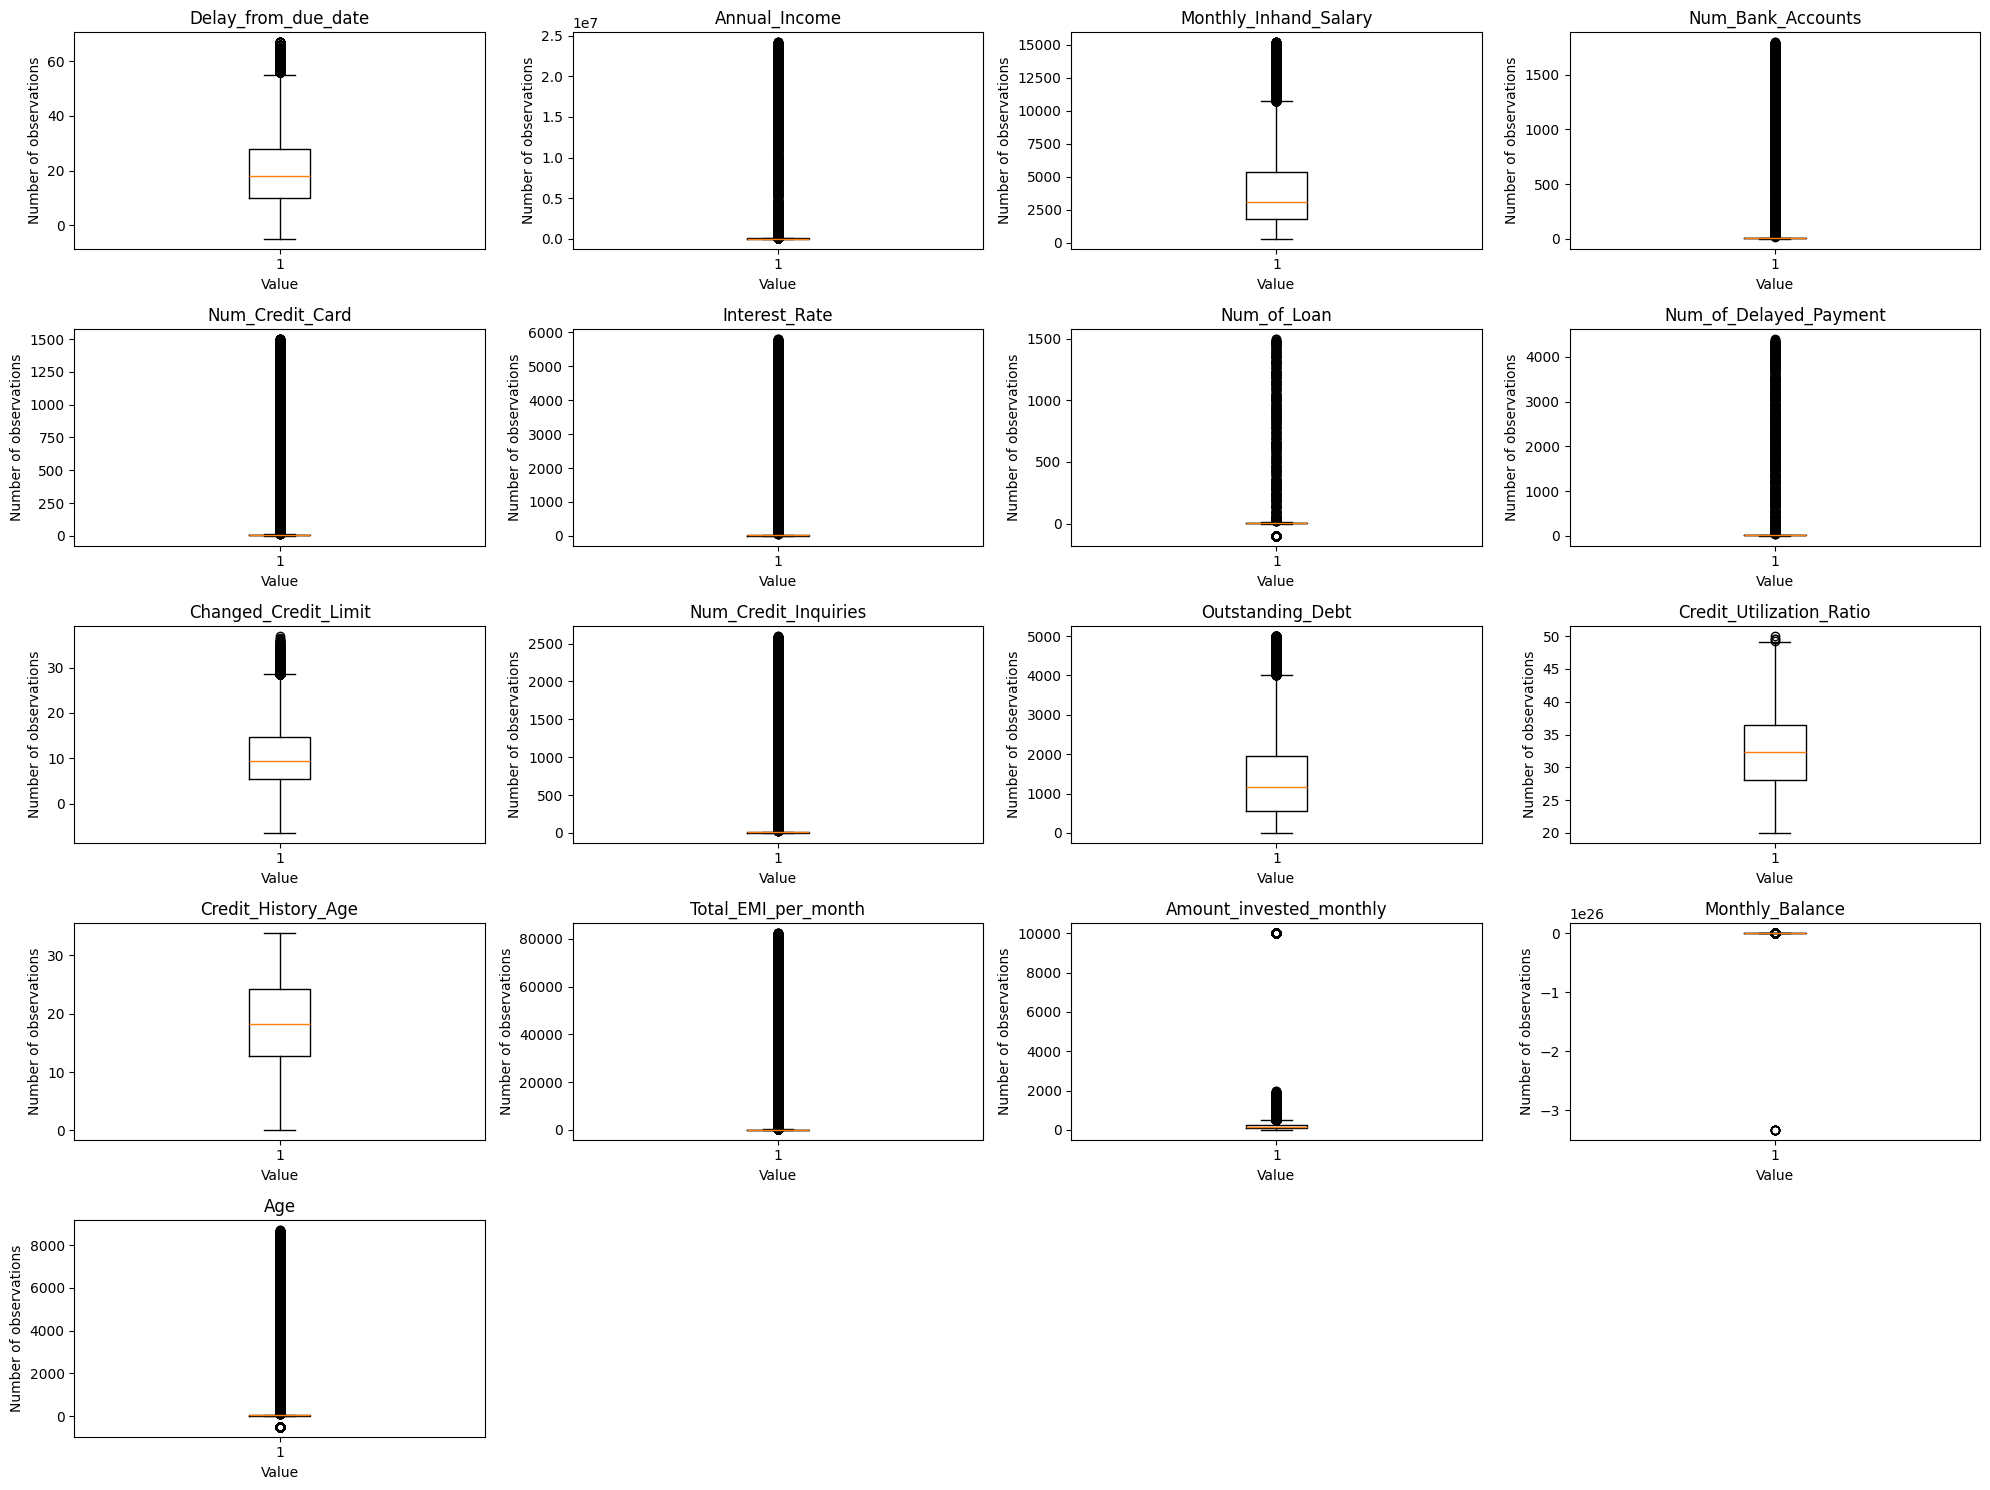

In [43]:
cols_outliers = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Age']
num_cols = 4
num_rows = len(cols_outliers) // num_cols + (len(cols_outliers) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, column in enumerate(cols_outliers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.boxplot(explored_data[column])
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
if len(cols_outliers) < num_rows * num_cols:
    for j in range(len(cols_outliers), num_rows * num_cols):
        axes.flat[j].set_visible(False)
plt.tight_layout()
plt.show()


In [44]:
def remove_outliers(data, columns, threshold=1.5):
    filtered_data = data.copy()
    for column in columns:
        Q1 = filtered_data[column].quantile(0.25)
        Q3 = filtered_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        filtered_data = filtered_data[(filtered_data[column] >= lower_bound) &(filtered_data[column] <= upper_bound)]
    return filtered_data

In [45]:
explored_data = remove_outliers(explored_data,columns_num)


In [46]:
explored_data = explored_data.drop_duplicates()


In [47]:
explored_data.shape


(55106, 22)

In [48]:
explored_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55106 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       55106 non-null  int64  
 1   Occupation                55106 non-null  object 
 2   Annual_Income             55106 non-null  float64
 3   Monthly_Inhand_Salary     55106 non-null  float64
 4   Num_Bank_Accounts         55106 non-null  int64  
 5   Num_Credit_Card           55106 non-null  int64  
 6   Interest_Rate             55106 non-null  int64  
 7   Num_of_Loan               55106 non-null  int64  
 8   Delay_from_due_date       55106 non-null  int64  
 9   Num_of_Delayed_Payment    55106 non-null  float64
 10  Changed_Credit_Limit      55106 non-null  float64
 11  Num_Credit_Inquiries      55106 non-null  float64
 12  Credit_Mix                55106 non-null  object 
 13  Outstanding_Debt          55106 non-null  float64
 14  Credit_Util

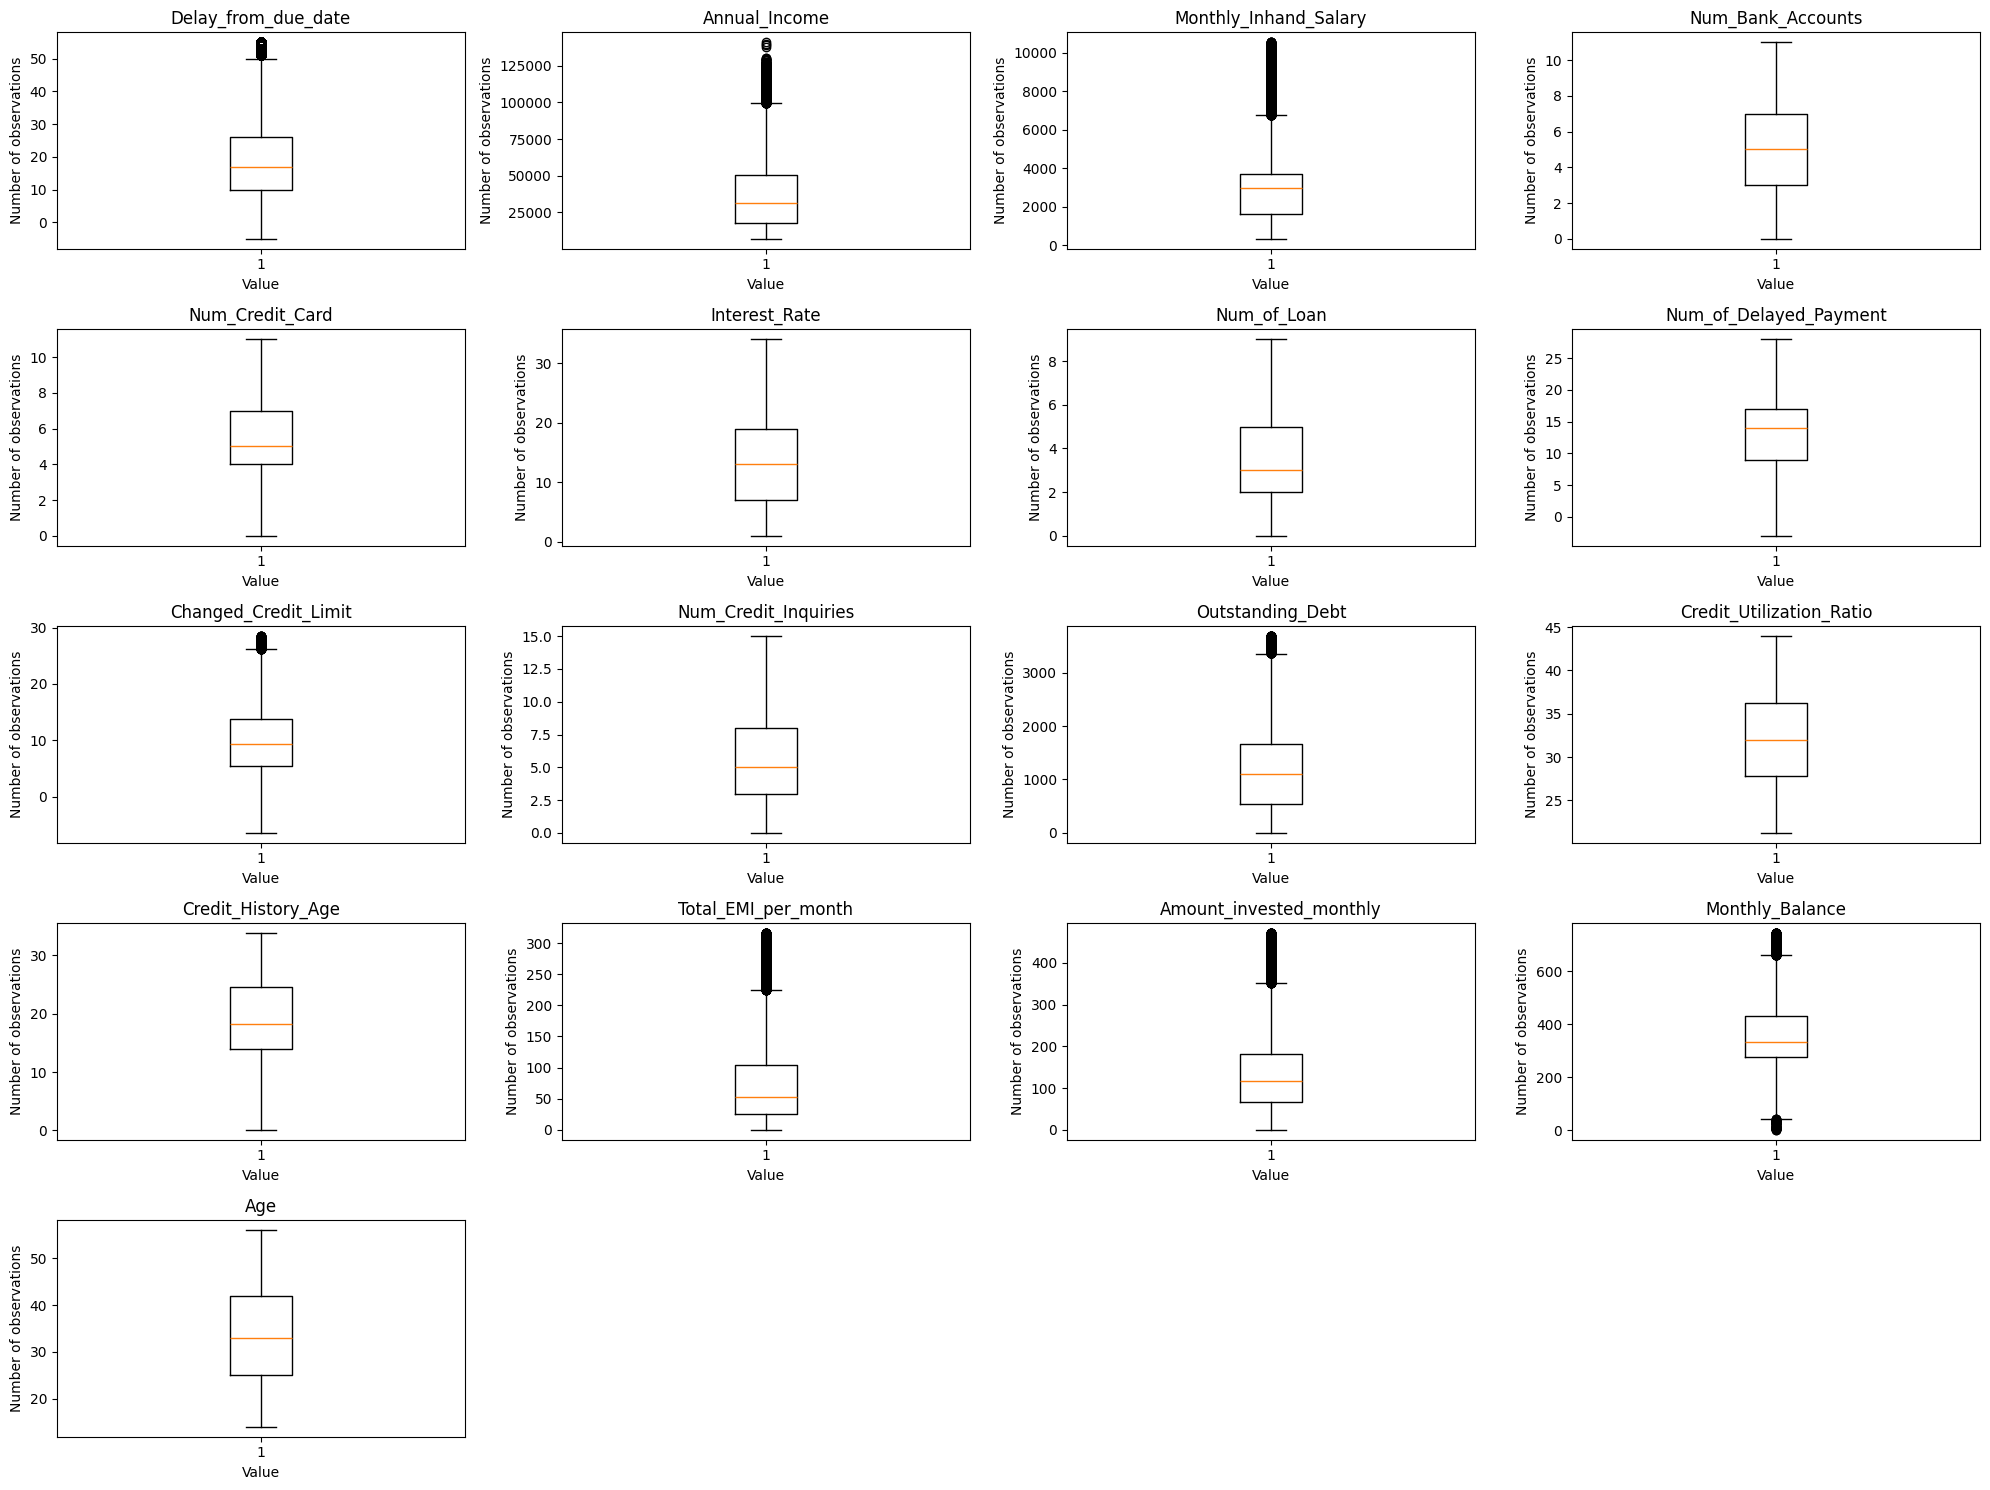

In [49]:
cols_outliers = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance',
'Age']
num_cols = 4
num_rows = len(cols_outliers) // num_cols + (len(cols_outliers) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, column in enumerate(cols_outliers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.boxplot(explored_data[column])
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
if len(cols_outliers) < num_rows * num_cols:
    for j in range(len(cols_outliers), num_rows * num_cols):
        axes.flat[j].set_visible(False)
plt.tight_layout()
plt.show()

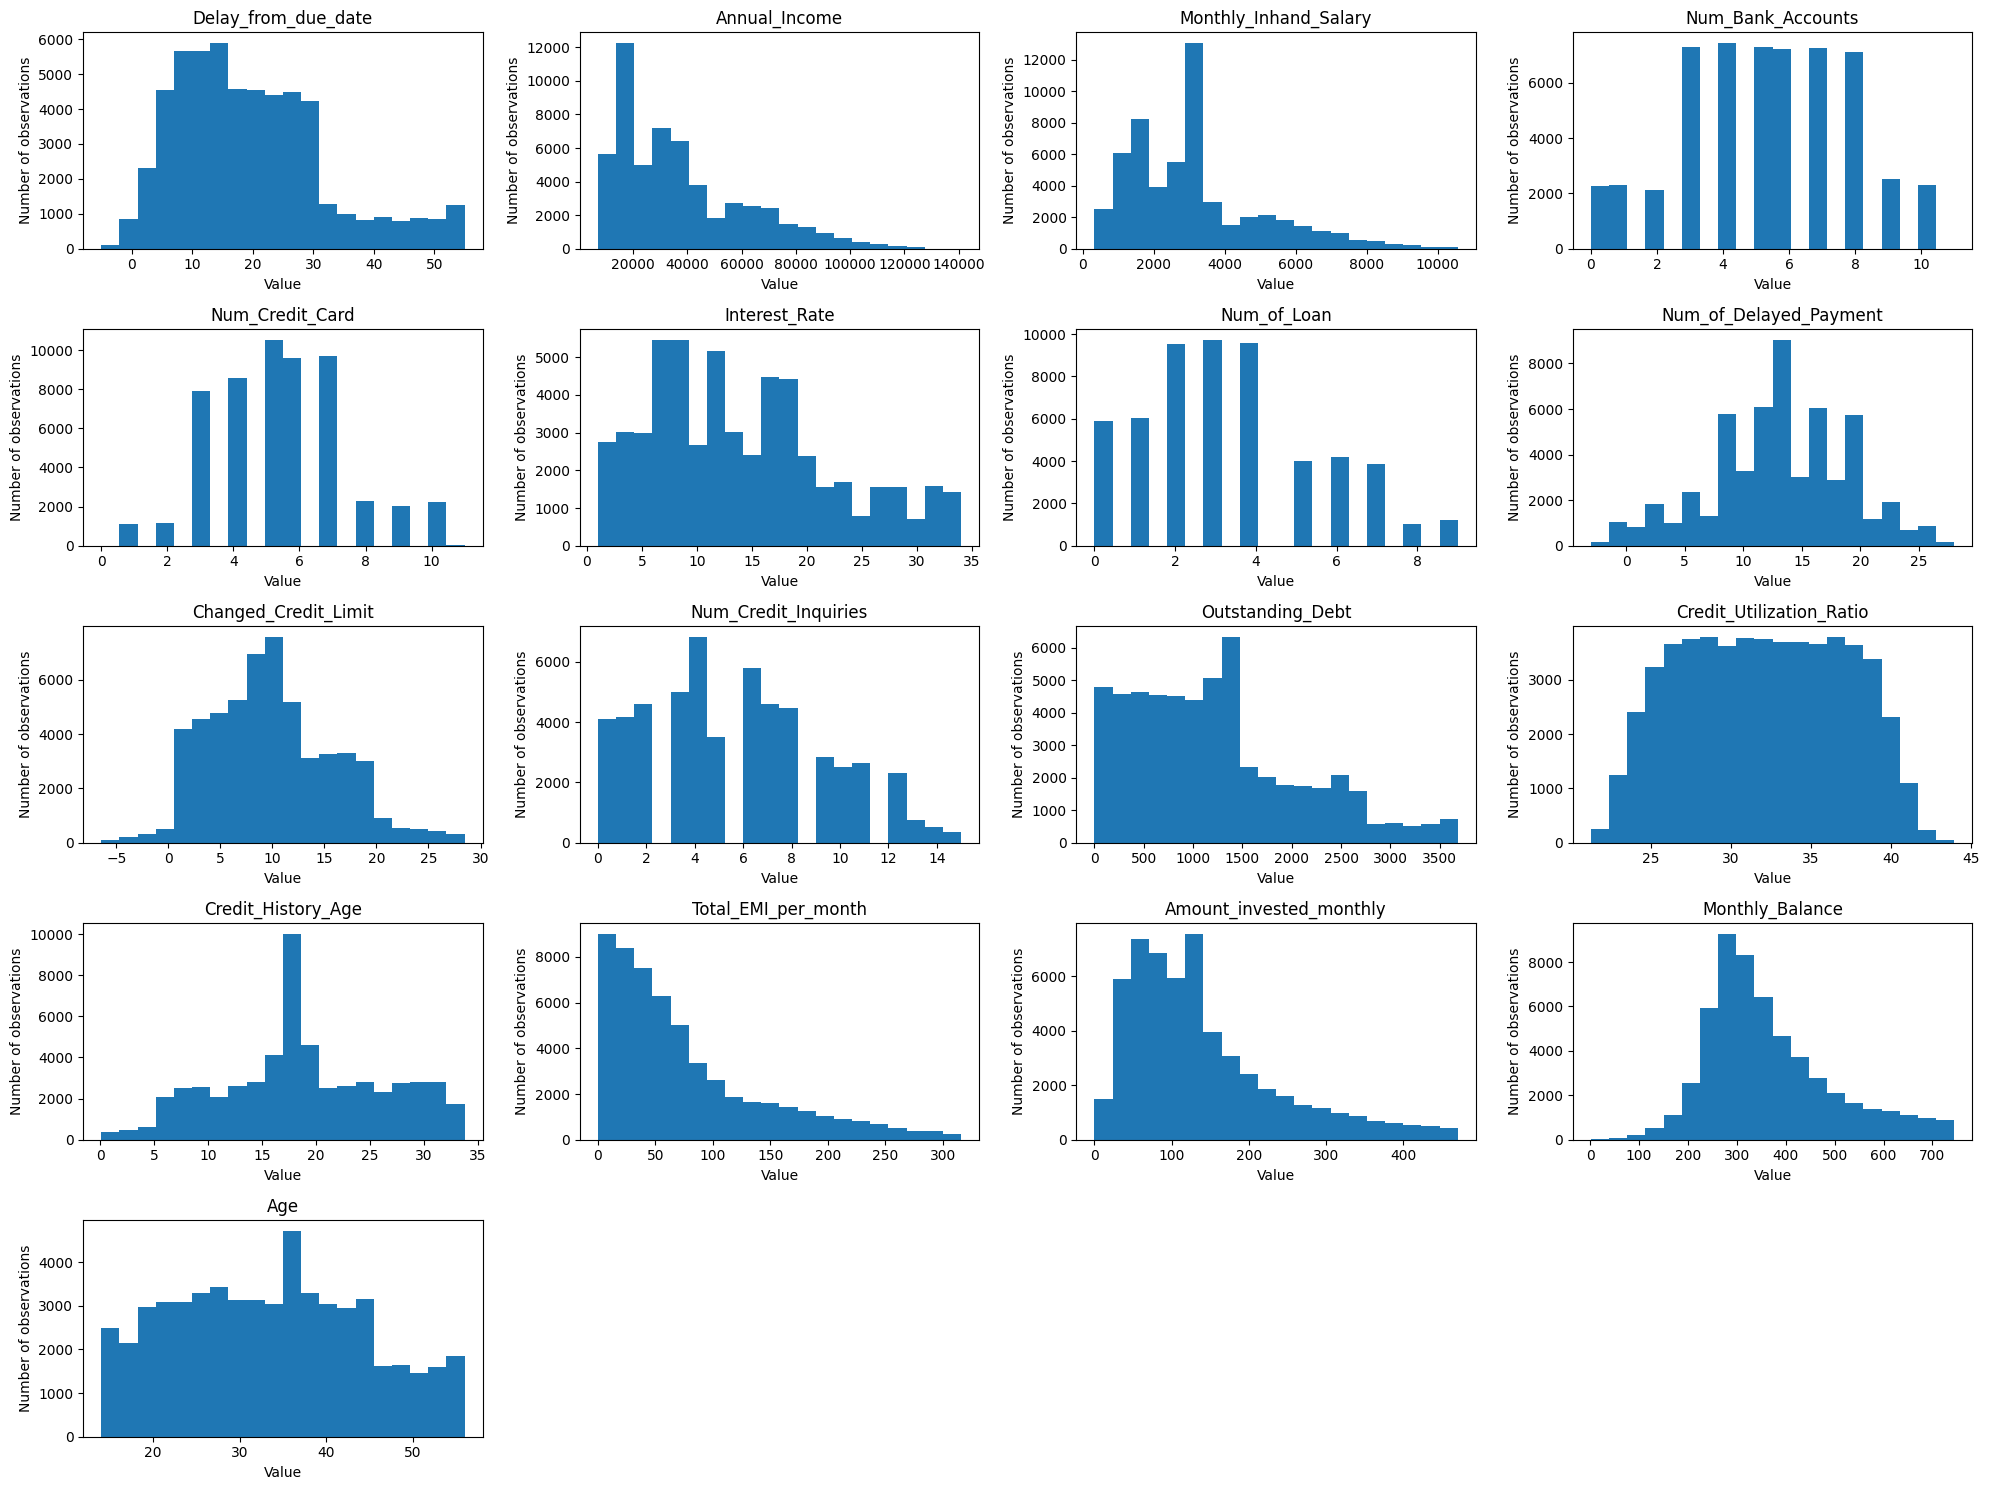

In [50]:
columns_no_outliers = ['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance',
'Age']
num_cols = 4
num_rows = len(columns_no_outliers) // num_cols + (len(columns_no_outliers) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, column in enumerate(columns_no_outliers):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(explored_data[column], bins=20)
    ax.set_xlabel('Value')
    ax.set_ylabel('Number of observations')
    ax.set_title(column)
if len(columns_num) < num_rows * num_cols:
    for j in range(len(columns_no_outliers), num_rows * num_cols):
        axes.flat[j].set_visible(False)
plt.tight_layout()
plt.show()


In [51]:
explored_data.sample(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
77725,38,Teacher,17172.14,1381.01,5,6,15,3,22,19.0,...,Standard,2334.98,35.62,10.1,Yes,24.96,36.24,High_spent_Medium_value_payments,326.90,Poor
16069,16,Manager,15359.74,3093.75,10,7,27,8,20,25.0,...,Good,2064.96,33.80,18.2,Yes,70.87,37.27,Low_spent_Large_value_payments,308.16,Standard
71141,30,Media_Manager,11944.67,1010.39,5,7,6,3,28,14.0,...,Standard,886.94,27.41,32.2,No,19.87,73.64,Low_spent_Medium_value_payments,287.53,Standard
14942,39,Developer,36791.90,2772.99,6,7,20,3,26,16.0,...,Standard,145.60,32.04,18.2,Yes,57.30,111.91,High_spent_Medium_value_payments,358.09,Standard
92499,44,Musician,15350.03,998.17,6,4,34,3,24,14.0,...,Good,2087.18,32.43,12.7,Yes,31.92,77.93,Low_spent_Large_value_payments,259.96,Poor


In [52]:
numerical_columns =['Delay_from_due_date','Annual_Income','Monthly_Inhand_Salary',
'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Age']


<Axes: >

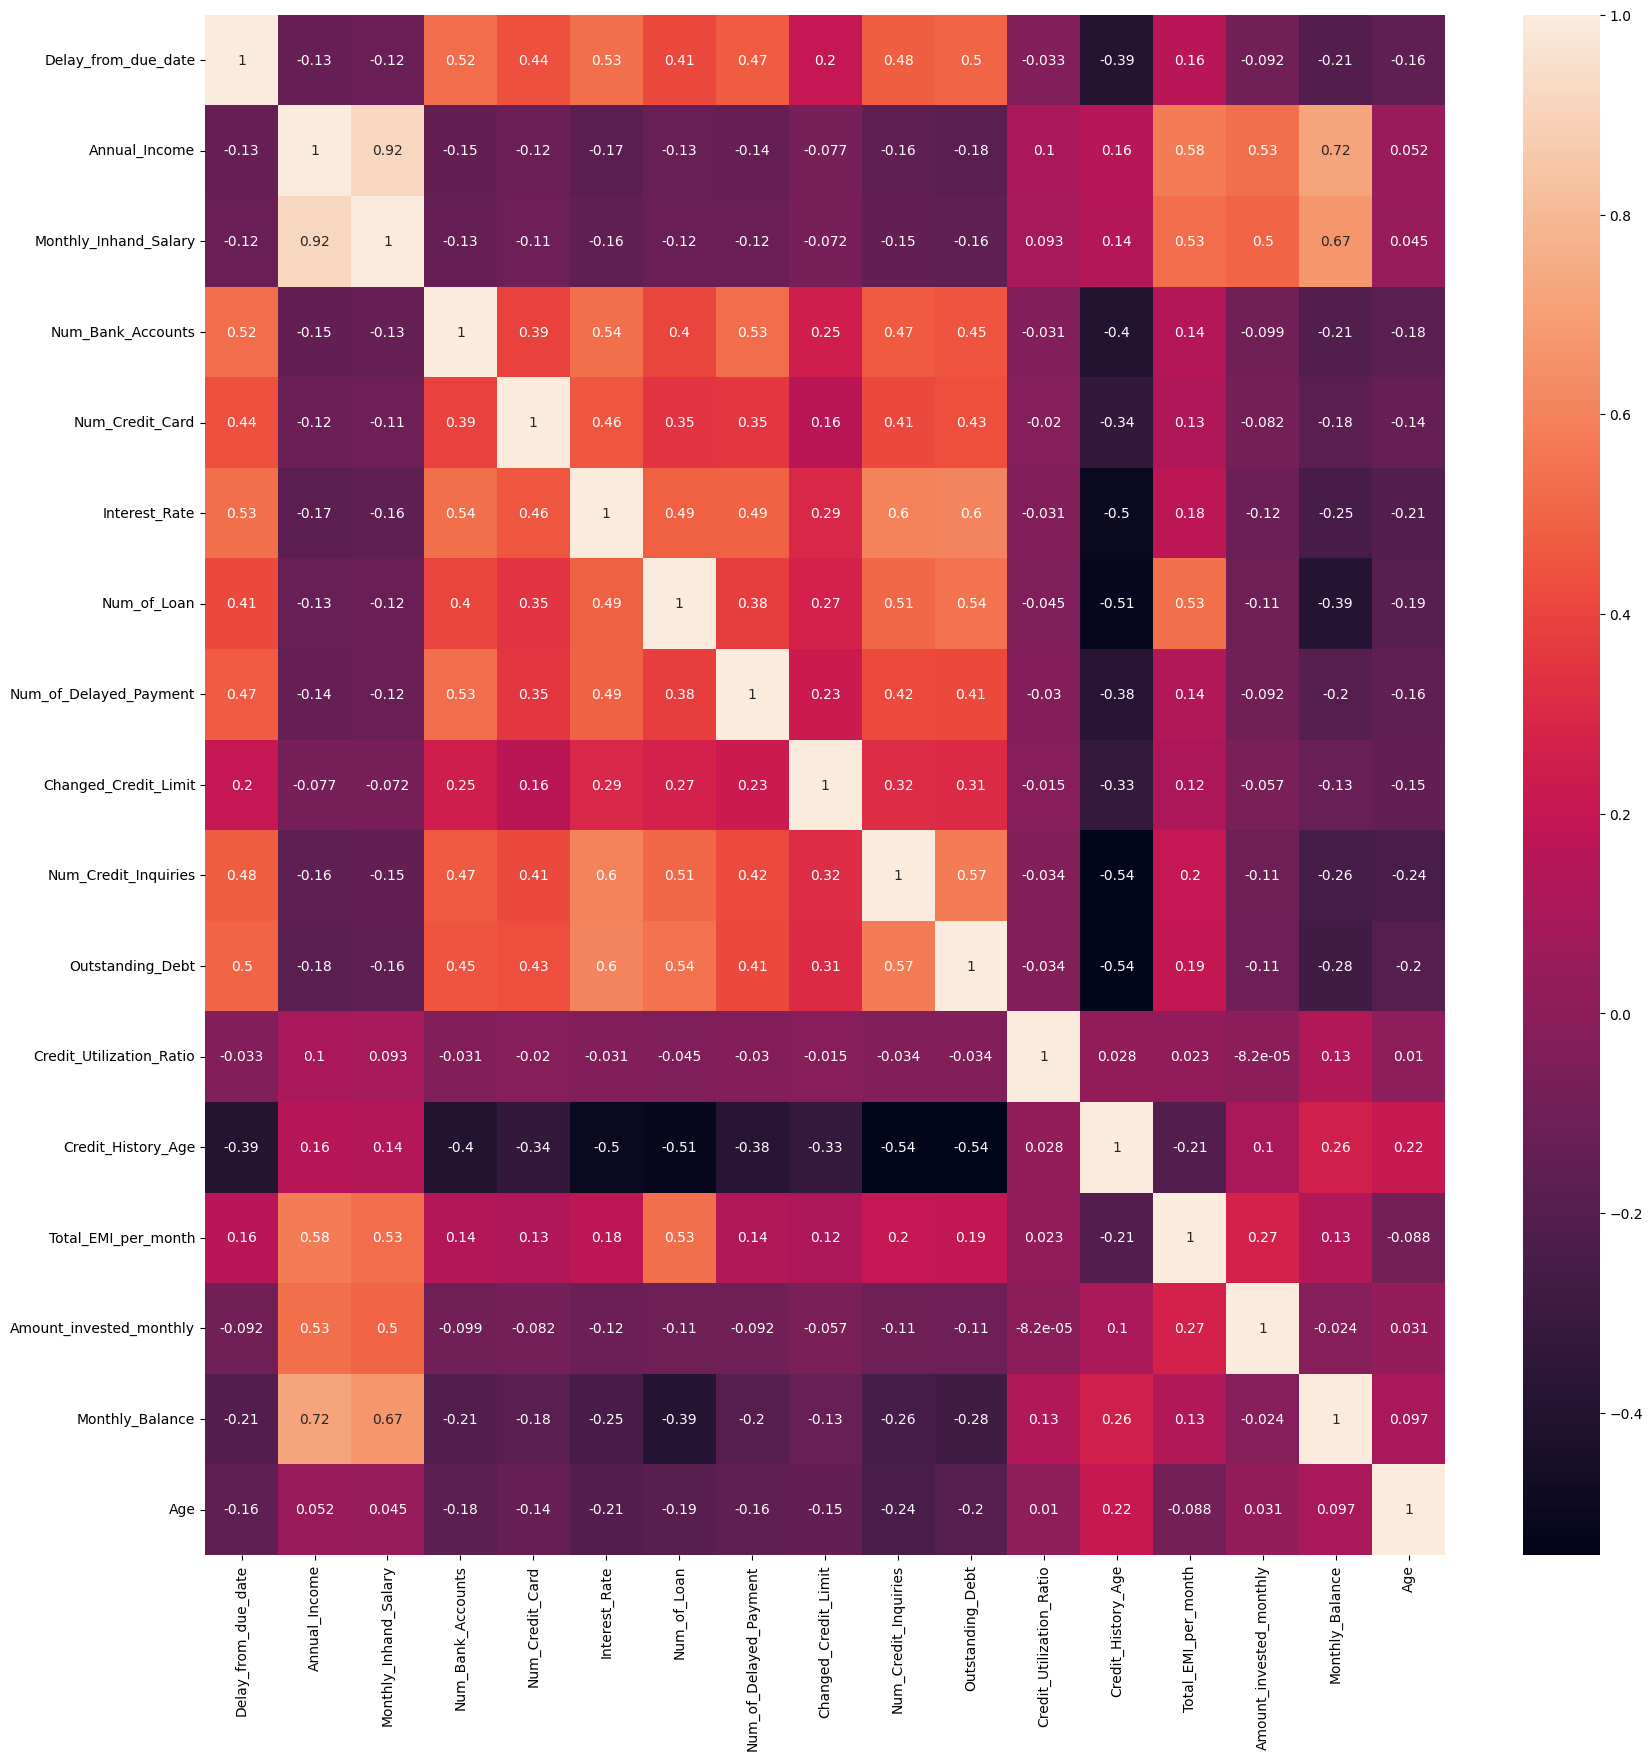

In [53]:
plt.figure(figsize= (20,20))
sns.heatmap(explored_data[numerical_columns].corr(),annot=True)


In [54]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
table_category_data = pd.crosstab(explored_data['Occupation'],[explored_data['Credit_Mix'], explored_data['Payment_of_Min_Amount'],explored_data['Payment_Behaviour'], filled_data['Credit_Score']])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(table_category_data)
print("Chi-square test:")
print("Test statistic:", chi2_stat)
print("p Value:", p_value)
print("Degrees of freedom:", dof)


Chi-square test:
Test statistic: 1688.362020652803
p Value: 6.190750209253355e-16
Degrees of freedom: 1246


In [55]:
data_model = explored_data.copy()

In [56]:
data_model['Credit_Score'] = data_model['Credit_Score'].replace({'Good':2,'Standard':1, 'Poor':0})

In [57]:
columns_text = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour']
encoded_data = pd.get_dummies(data_model[columns_text],prefix=columns_text,drop_first=True)
encoded_data

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
99995,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
99998,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False


In [58]:
data_model = data_model.drop(columns_text, axis=1)
data_model = data_model.join(encoded_data)


In [59]:
data_model.sample(5)


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
3962,35,18578.88,1426.24,1,3,1,3,15,11.0,11.87,...,False,False,True,False,False,False,False,False,False,True
4131,41,19519.57,1893.63,6,6,19,2,33,14.0,9.92,...,False,False,False,False,True,True,False,False,False,False
22988,39,34763.33,3093.75,7,5,8,2,15,17.0,7.50,...,False,True,True,False,True,True,False,False,False,False
85819,44,9637.64,663.14,7,7,28,6,38,18.0,5.32,...,False,False,False,False,True,False,False,False,False,True
13024,25,14441.51,3093.75,9,8,26,2,15,14.0,9.85,...,False,False,False,False,True,False,False,True,False,False


In [60]:
standarized_data = data_model.copy()

In [61]:
standarized_data.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behavio

In [62]:
standarized_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary','Num_Bank_Accounts',
'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
'Monthly_Balance']

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
standarized_data[standarized_cols] = scaler.fit_transform(standarized_data[standarized_cols])


In [66]:
standarized_data.sample(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
63812,-1.514062,1.200430,1.254973,-0.515595,-0.210251,0.111420,-0.599513,-0.417557,0.317084,-0.433466,...,False,True,False,True,True,False,False,False,False,False
63049,0.329905,-0.894959,-0.938304,1.089600,2.308899,0.468559,-0.599513,1.023916,0.834676,-1.920427,...,True,False,False,False,True,False,False,False,False,True
83065,-0.223285,0.919565,1.003390,1.892198,2.308899,2.016160,1.190953,1.264161,1.007206,1.683306,...,False,False,False,False,True,True,False,False,False,False
48012,-0.592078,-0.096153,0.026423,-0.515595,-0.714080,0.468559,-0.151897,-0.978130,0.489614,0.021211,...,False,False,False,True,True,False,False,False,False,True
85326,-1.145269,-0.745154,-0.840673,-0.114296,-0.714080,0.349513,1.190953,-0.417557,1.007206,0.923828,...,False,False,False,True,True,False,False,True,False,False


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
data = standarized_data.copy()


In [69]:
X = data
y = data.pop('Credit_Score')


In [70]:
X.shape

(55106, 39)

In [71]:
y.shape

(55106,)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [73]:
print(f'Train set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')
print(f'Target train set size: {y_train.shape}')
print(f'Target test size: {y_test.shape}')


Train set size: (38574, 39)
Test set size: (16532, 39)
Target train set size: (38574,)
Target test size: (16532,)


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [75]:
parameters_tree = {'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
'criterion':['gini','entropy'],
'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

In [76]:
tree_clf = DecisionTreeClassifier()
grid_search_tree =GridSearchCV(tree_clf,parameters_tree,scoring='accuracy',cv=5)
grid_search_tree.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [77]:
best_params = grid_search_tree.best_params_
print("Best parameters:", best_params)
best_model = grid_search_tree.best_estimator_
accuracy = best_model.score(X, y)
print("Accuracy: ", accuracy*100)


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4}
Accuracy:  73.92842884622364


In [78]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [79]:
y_pred_tree = best_model.predict(X_test)


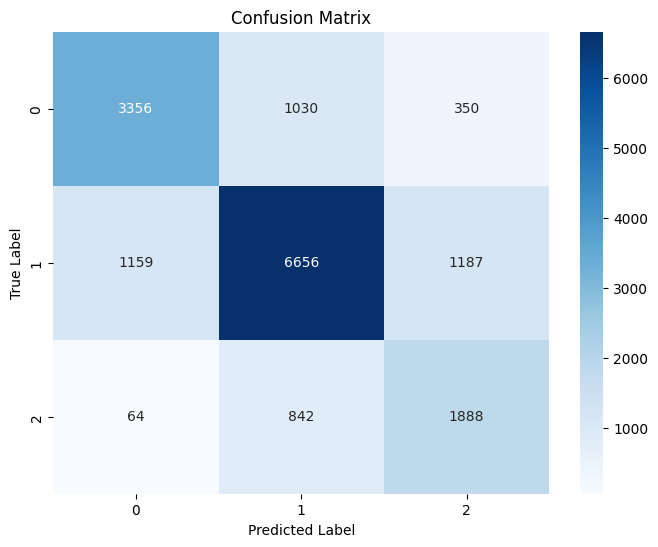

In [80]:
cm = confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(cm)

In [81]:
print(classification_report(y_test,y_pred_tree, zero_division=1))


              precision    recall  f1-score   support

           0       0.73      0.71      0.72      4736
           1       0.78      0.74      0.76      9002
           2       0.55      0.68      0.61      2794

    accuracy                           0.72     16532
   macro avg       0.69      0.71      0.70     16532
weighted avg       0.73      0.72      0.72     16532



In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
random_forest_cls = RandomForestClassifier()
param_grid_random_forest_clf = {
'n_estimators': [5, 10, 15],
'max_depth': [None, 5, 10, 15],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['sqrt', 'log2'],
'criterion': ['gini', 'entropy']
}

In [84]:
grid_search_random_forest = GridSearchCV(estimator=random_forest_cls,param_grid=param_grid_random_forest_clf, cv=5)
grid_search_random_forest.fit(X_train,y_train)
best_params = grid_search_random_forest.best_params_

In [85]:
print("Best parameters:", best_params)
best_model = grid_search_random_forest.best_estimator_
accuracy = best_model.score(X, y)
print("Accuracy: ", accuracy*100)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}


Accuracy:  92.64326933546256


In [86]:
y_pred_random_forest = best_model.predict(X_test)


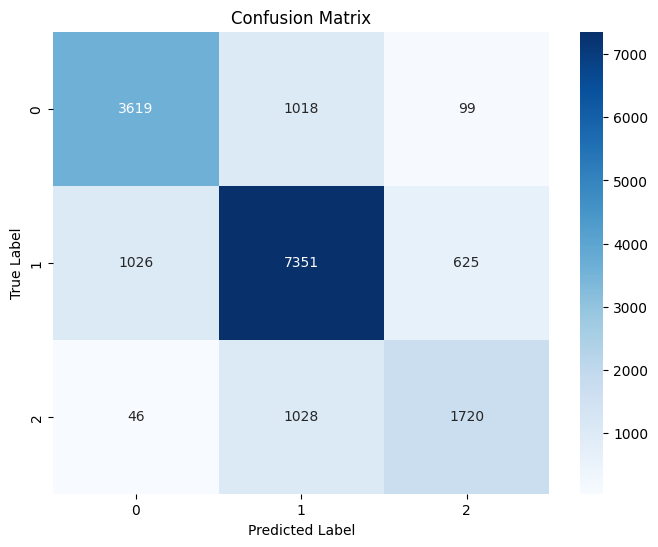

<Figure size 640x480 with 0 Axes>

In [87]:
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
plot_confusion_matrix(cm_random_forest)
plt.savefig('cm_random_forest.png')


In [88]:
print(classification_report(y_test,y_pred_random_forest, zero_division=1))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      4736
           1       0.78      0.82      0.80      9002
           2       0.70      0.62      0.66      2794

    accuracy                           0.77     16532
   macro avg       0.75      0.73      0.74     16532
weighted avg       0.77      0.77      0.77     16532



In [89]:
#For saving models
import pickle

In [90]:
# Save the results using pickle
with open('random_forest_cls.pkl', 'wb') as file:
    pickle.dump(random_forest_cls, file)

with open('grid_search_random_forest.pkl', 'wb') as file:
    pickle.dump(grid_search_random_forest, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('cm_random_forest.pkl', 'wb') as file:
    pickle.dump(cm_random_forest, file)

with open('classification_report.pkl', 'wb') as file:
    pickle.dump(classification_report, file)